<h2 style="color:purple" align="Center" >Outlier Detection Using Normal Distribution</h2>

In [16]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv("heights_with_outliers.csv")
df.head(5)

,name,height
0,Aarav,5.45
1,Deepika,8.20
2,Abhishek,5.65
3,Sneha,5.52
4,Kriti,5.69


In [18]:
df.describe()

,height
count,1000.000000
mean,5.611180
std,0.372654
min,3.200000
25%,5.350000
50%,5.625000
75%,5.852500
max,9.400000


You can see above that the minimum height is 3.2 and max is 9.4 feet. These seem like outliers because a person with a height 9.4 ft sounds like a data error

In [19]:
mean = df.height.mean()
std = df.height.std()

mean, std

(5.61118, 0.37265356335110805)

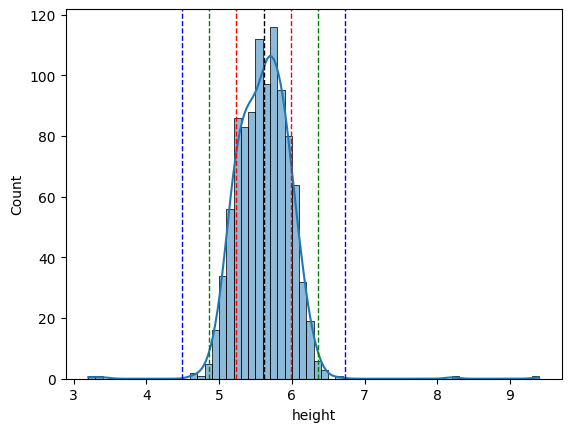

In [20]:
sns.histplot(df.height, kde=True)

plt.axvline(mean, color='k', linestyle='dashed', linewidth=1)

# one stadard deviation
plt.axvline(mean + std, color='r', linestyle='dashed', linewidth=1)
plt.axvline(mean - std, color='r', linestyle='dashed', linewidth=1)

# two standard deviation
plt.axvline(mean + 2*std, color='g', linestyle='dashed', linewidth=1)
plt.axvline(mean - 2*std, color='g', linestyle='dashed', linewidth=1)

# three standard deviation
plt.axvline(mean + 3*std, color='b', linestyle='dashed', linewidth=1)
plt.axvline(mean - 3*std, color='b', linestyle='dashed', linewidth=1)

In [21]:
lower = df.height.mean() - 3*df.height.std()
upper = df.height.mean() + 3*df.height.std()

lower, upper

(4.493219309946676, 6.729140690053324)

Let's print all the outliers now using lower and upper boundries

In [22]:
df[(df.height<lower)|(df.height>upper)]

,name,height
1,Deepika,8.2
16,Tanvi,3.2
57,Priya,3.4
76,Aarav,9.4


In [23]:
df_no_outliers = df[(df.height>lower)&(df.height<upper)]
df_no_outliers.describe()

,height
count,996.000000
mean,5.609418
std,0.327881
min,4.650000
25%,5.357500
50%,5.625000
75%,5.850000
max,6.630000


<Axes: xlabel='height', ylabel='Count'>

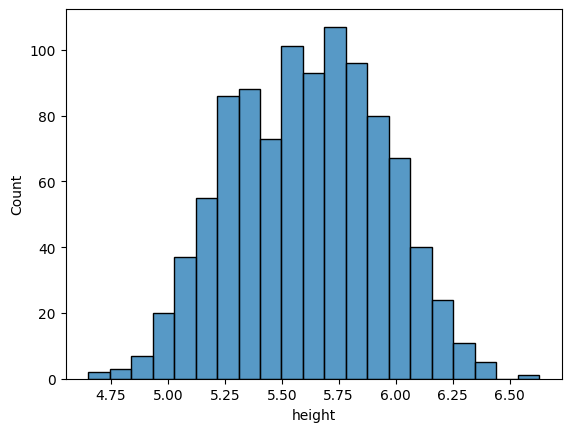

In [24]:
sns.histplot(df_no_outliers.height)

Outliers are now gone and the histogram looks normal. It is a standard practice in the industry to use 3 standard deviation as a thresold to detect the outliers